In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Database/CovidSample.csv', sep=';')
df

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,2020-05-29,2020-05-31,Bogotá,Kennedy,32,1,F,Relacionado,Casa,Recuperado
9995,9996,2020-05-28,2020-05-31,Bogotá,Usaquén,70,1,F,En estudio,Casa,Recuperado
9996,9997,2020-05-27,2020-05-31,Bogotá,Suba,32,1,F,Relacionado,Casa,Recuperado
9997,9998,2020-05-27,2020-05-31,Bogotá,Suba,2,1,M,Relacionado,Casa,Recuperado


In [4]:
N = df.shape[0] #Poblacion

In [5]:
maskF = df['SEXO'] == 'F' #Casos Mujeres
maskM = df['SEXO'] == 'M' #Casos Hombres
maskFallecidos = df['ESTADO'] == 'Fallecido' #Casos Fallecidos

In [6]:
df_Female = df[maskF] #DataFrame Mujeres
df_Male = df[maskM]   #DataFrame Hombres

In [7]:
NF = df_Female.shape[0] #Total Mujeres
NM = df_Male.shape[0]   #Total Hombres

In [8]:
PF = NF/N #Probabilidad Mujeres
PM = NM/N #Probabilidad Hombres

In [9]:
print(f"P(MujerAfectada): ", PF, f"\nP(HombreAfectado): " , PM , f"\nP(Total):", PF+PM)

P(MujerAfectada):  0.4821482148214821 
P(HombreAfectado):  0.5178517851785178 
P(Total): 1.0


In [10]:
#tarea 1 : Edad media de fallecimientos de M
#tarea 2 : Probabildiad de fallecimientos de M

In [11]:
dfFemaleFallecido = df[ maskF & maskFallecidos ]
dfMaleFallecido = df[ maskM & maskFallecidos ] ## TAREA 1

In [12]:
CrossEdadF = pd.crosstab( index = dfFemaleFallecido['EDAD'], columns = dfFemaleFallecido['ESTADO'])
CrossEdadM = pd.crosstab( index = dfMaleFallecido['EDAD'], columns = dfMaleFallecido['ESTADO'])

<Axes: xlabel='EDAD'>

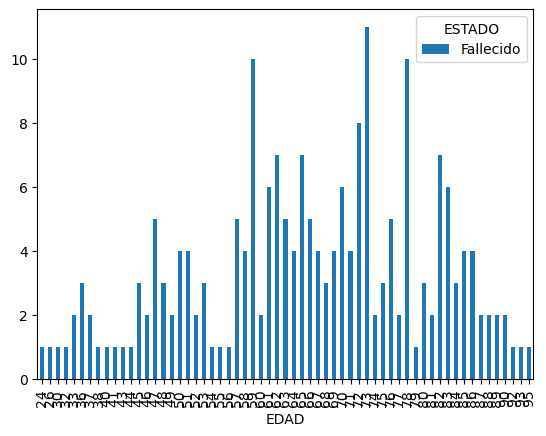

In [13]:
CrossEdadM.plot(kind='bar')

In [14]:
#Calculo de la media de la distribucion de hombre y mujeres que fallecen
EdadF = np.array(CrossEdadF.index) 
EdadM = np.array(CrossEdadM.index) # selecciono un array con los indices de la tabla de contingencia

In [15]:
F_fabs = np.array(CrossEdadF.Fallecido)
M_fabs = np.array(CrossEdadM.Fallecido)

In [16]:
PFallecimientoF = F_fabs/np.sum(F_fabs) #Frecuencia Relativa 
PFallecimientoM = M_fabs/np.sum(M_fabs) #Frecuencia Relativa

# Media agrupada por estrato

In [58]:
meanF = np.sum(EdadF*PFallecimientoF)
meanM = np.sum(EdadM*PFallecimientoM)

In [18]:
print("Edad media Hombres: ",meanM,f"\nEdad media Mujeres: ",meanF)

Edad media Hombres:  65.75609756097562 
Edad media Mujeres:  71.03149606299213


In [19]:
#print(f"Probabilidad\n Hombres: ",PFallecimientoF,f"\nEdad media Mujeres: ",PFallecimientoM)

In [20]:
DictF ={'EdadF':EdadF, 'P(F)':PFallecimientoF}
DictM  ={'EdadM':EdadM, 'P(M)':PFallecimientoM}

In [21]:
df_salidaF = pd.DataFrame(DictF)
df_salidaM = pd.DataFrame(DictM)

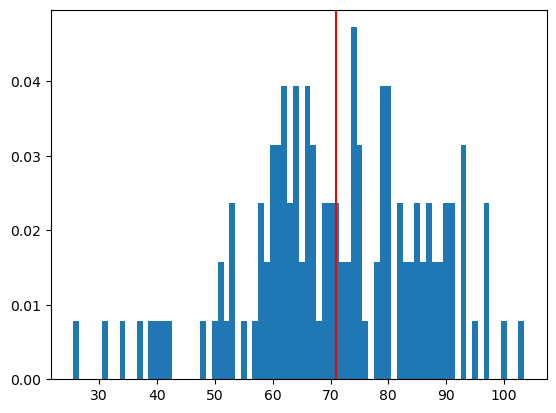

In [22]:
plt.bar(EdadF,PFallecimientoF, width=1)
plt.axvline(x=meanF, color='r')

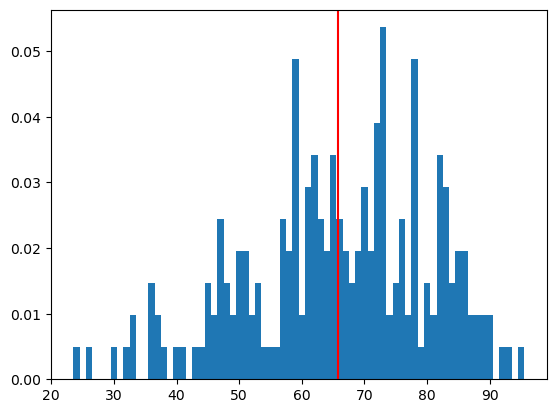

In [23]:
plt.bar(EdadM,PFallecimientoM, width=1)
plt.axvline(x=meanM, color='r')

<Axes: xlabel='EDAD', ylabel='SEXO'>

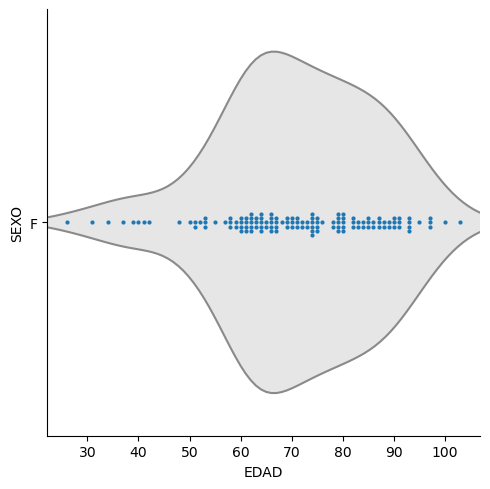

In [24]:
sns.catplot( x = 'EDAD', y = 'SEXO', data = dfFemaleFallecido, kind='violin',color='.9', inner=None)
sns.swarmplot( x = 'EDAD', y = 'SEXO', data = dfFemaleFallecido, size=3 )

In [25]:
df2 = df[maskFallecidos]

<Axes: xlabel='EDAD', ylabel='SEXO'>

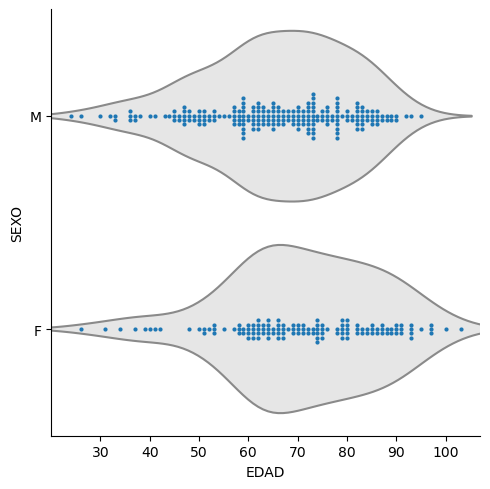

In [26]:
sns.catplot( x = 'EDAD', y = 'SEXO', data = df2, kind='violin',color='.9', inner=None)
sns.swarmplot( x = 'EDAD', y = 'SEXO', data = df2, size=3 )

In [27]:
df2 = df[maskFallecidos].head(10)

In [35]:
#sns.catplot( x = 'LOCALIDAD_ASIS', y='EDAD', data = df2, kind='violin', inner=None)

In [36]:
#sns.catplot(x="LOCALIDAD_ASIS",y="EDAD",data=df2, kind="violin")

In [32]:
#fig, ax = plt.subplots(1,2, figsize = (15,5))
#sns.barplot(x=CrossEdadF.index, y='Fallecido')
#sns.barplot(x=CrossEdadM, y='Fallecido')

# Calcular la varianza de la edad en hombres y mujeres de los valores AGRUPADOS

In [51]:
dif_F = (EdadF-meanF)**2
dif_M = (EdadM-meanM)**2
s2F = np.sum(PFallecimientoF*dif_F)
s2M = np.sum(PFallecimientoM*dif_M)

In [54]:
stdF = np.sqrt(s2F)
stdM = np.sqrt(s2M)

In [56]:
print("Desviacion estandar :", f"\n Mujeres:",stdF,f"\n Hombres:", stdM)

Desviacion estandar : 
 Mujeres: 15.349439964070822 
 Hombres: 14.710839686542872


In [66]:
x = np.linspace(0,110)
#modelo1 = norm.pdf(x, loc=meanM, scale=stdF)
#modelo1 = norm.pdf(x, loc=meanM, scale=stdF)

In [68]:
#plt.plot(x,modelo1, color='r')
#plt.bar( CrossEdadF.index, CrossEdadF.Fallecido/np.sum(CrossEdadF.Fallecido))

In [69]:
#plt.plot(x,modelo1, color='r')
#plt.bar( CrossEdadM.index, CrossEdadM.Fallecido/np.sum(CrossEdadM.Fallecido))